In [30]:
import datetime
from pathlib import Path
import atomic as atom
import definitions as defs
import visuals as vis 

from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from ta.trend import IchimokuIndicator
from ta.trend import EMAIndicator
from ta.trend import SMAIndicator
from ta.trend import ADXIndicator
from ta.volatility import KeltnerChannel

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
Banknifty_Path = "../NIFTYOptionsData/OptionsData/Banknifty/"
Nifty_Path = "../NIFTYOptionsData/OptionsData/Nifty/"
start_date = datetime.date(2022, 1, 3)
date_string = start_date.strftime("%Y/Data%Y%m%d.csv")
BNPath = Banknifty_Path + date_string
NPath = Nifty_Path + date_string
my_fileN = Path(NPath)
my_fileBN = Path(BNPath)
# print("Working on file - "+date_string)
if my_fileN.exists() and my_fileBN.exists():
  masterdfN = atom.LoadDF(NPath)
  masterdfBN = atom.LoadDF(BNPath)
masterdf = masterdfBN

EnterTime = datetime.time(9,30)
symbol = defs.BN
spotdata = atom.GetSpotData(masterdf, defs.BN)
for s in range(len(spotdata)):
    currentcandle = spotdata.iloc[s]
    if currentcandle.name.time() == EnterTime:
        exp = atom.GetExpiry(masterdf, symbol)
        if symbol == defs.N :
            cst = currentcandle["open"]
            cst = int(round(cst / 50, 0)*50)
        elif symbol == defs.BN :
            cst = currentcandle["open"]
            cst = int(round(cst / 100, 0) * 100)
        opdfCE = masterdf[masterdf['symbol'] == symbol + exp + str(cst) + "CE"]
        opdfPE = masterdf[masterdf['symbol'] == symbol + exp + str(cst) + "PE"]
        break
opdfCE

/Users/rishabhiyer/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,datetime,close,date,high,low,oi,open,symbol,time,volume
datetime,,,,,,,,,,
2022-01-03 09:15:00,2022-01-03 09:15:00,398.20,2022-01-03,496.65,300.0,483600.0,496.65,BANKNIFTY06JAN2235600CE,09:15:00,395978
2022-01-03 09:16:00,2022-01-03 09:16:00,387.35,2022-01-03,399.60,385.3,483600.0,395.00,BANKNIFTY06JAN2235600CE,09:16:00,201175
2022-01-03 09:17:00,2022-01-03 09:17:00,376.45,2022-01-03,386.75,364.8,626500.0,385.95,BANKNIFTY06JAN2235600CE,09:17:00,238125
2022-01-03 09:18:00,2022-01-03 09:18:00,399.75,2022-01-03,403.50,377.8,626500.0,378.20,BANKNIFTY06JAN2235600CE,09:18:00,286525
2022-01-03 09:19:00,2022-01-03 09:19:00,398.85,2022-01-03,403.85,391.1,626500.0,398.30,BANKNIFTY06JAN2235600CE,09:19:00,246675
...,...,...,...,...,...,...,...,...,...,...
2022-01-03 15:25:00,2022-01-03 15:25:00,950.15,2022-01-03,953.25,934.5,164050.0,935.30,BANKNIFTY06JAN2235600CE,15:25:00,10675
2022-01-03 15:26:00,2022-01-03 15:26:00,950.05,2022-01-03,952.00,941.9,164050.0,948.00,BANKNIFTY06JAN2235600CE,15:26:00,5250
2022-01-03 15:27:00,2022-01-03 15:27:00,960.00,2022-01-03,960.00,952.0,159625.0,952.00,BANKNIFTY06JAN2235600CE,15:27:00,3100


/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_13718/1235997387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opdfCE["sma"] = SMA.sma_indicator()
/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_13718/1235997387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opdfCE["ema"] = EMA.ema_indicator()
/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_13718/1235997387.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

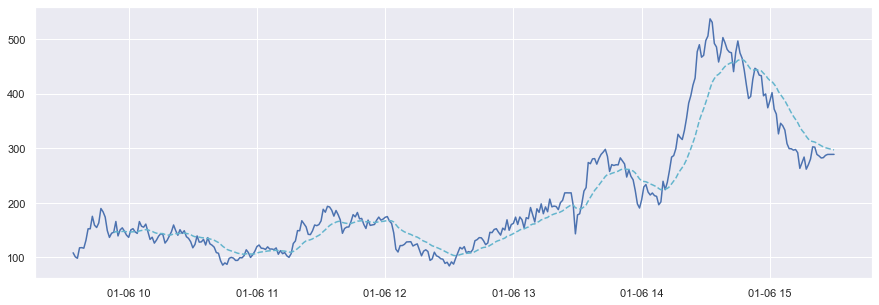

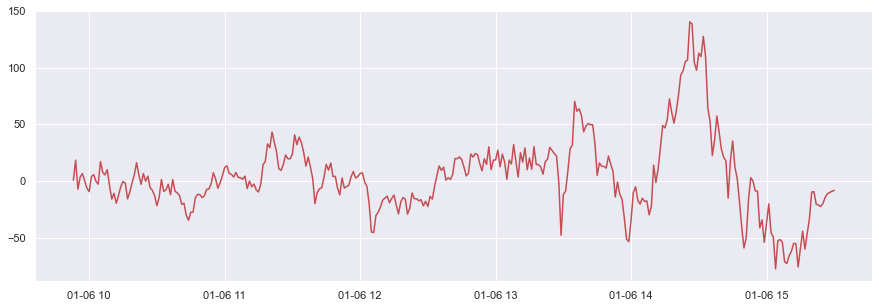

In [27]:
win = 20
SMA = SMAIndicator(opdfCE['open'], window=win)
EMA = EMAIndicator(opdfCE['open'], window=win)
opdfCE["sma"] = SMA.sma_indicator()
opdfCE["ema"] = EMA.ema_indicator()
opdfCE["madiff"] = opdfCE["open"] - opdfCE["ema"]
opdfCE.dropna()

fig = plt.figure(figsize = (15,5))
plt.plot(opdfCE[['open']],'b')
plt.plot(opdfCE["ema"],'c--')
plt.show()

fig = plt.figure(figsize = (15,5))
plt.plot(opdfCE["madiff"],'r')
plt.show()


/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_13718/2393779601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opdfCE["rsi"] = Rsi.rsi()
/Users/rishabhiyer/opt/anaconda3/lib/python3.9/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/rishabhiyer/opt/anaconda3/lib/python3.9/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_13718/2393779601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

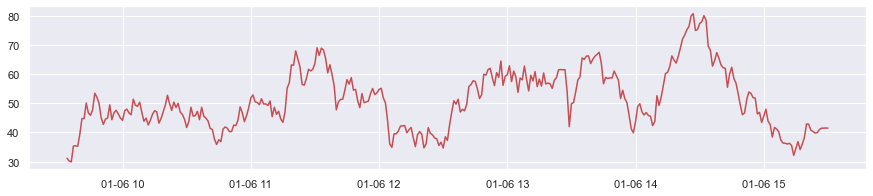

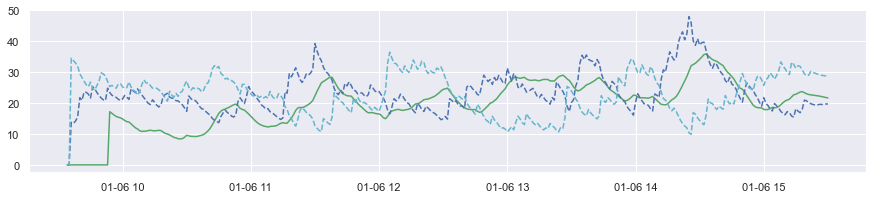

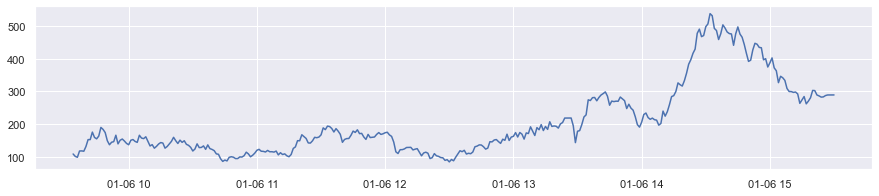

In [26]:
Rsi = RSIIndicator(opdfCE['open'], window=win)
opdfCE["rsi"] = Rsi.rsi()
Adx = ADXIndicator(opdfCE['high'], opdfCE['low'], opdfCE['close'], window = win)
opdfCE["adx"] = Adx.adx()
opdfCE["diplus"] = Adx.adx_pos()
opdfCE["diminus"] = Adx.adx_neg()
opdfCE = opdfCE.dropna()
fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE["rsi"],'r')
plt.show()

fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE["adx"],'g')
plt.plot(opdfCE["diplus"], 'b--')
plt.plot(opdfCE["diminus"], 'c--')
plt.show()

fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE["open"],'b')
plt.show()


/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_13718/747578508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opdfCE["hbandkc"] = kc.keltner_channel_hband()
/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_13718/747578508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opdfCE["lbandkc"] = kc.keltner_channel_lband()


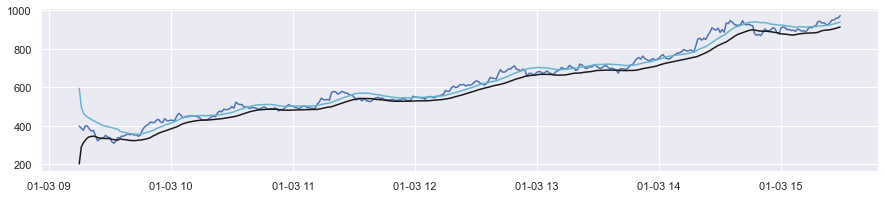

In [35]:
win = 20
window_atr = 10
kc = KeltnerChannel(opdfCE["high"], opdfCE["low"], opdfCE["close"], win, window_atr)
opdfCE["hbandkc"] = kc.keltner_channel_hband()
opdfCE["lbandkc"] = kc.keltner_channel_lband()
opdfCE = opdfCE.dropna()
fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE[['close']],'b')
plt.plot(opdfCE["hbandkc"],'c')
plt.plot(opdfCE["lbandkc"],'k')
plt.show()
